In [24]:
'''
    'patient_id': 'Unique identifier for each patient',
    'readmission_flag': 'Indicates whether the patient was readmitted (1 for readmission, 0 for no readmission)',
    'readmission_cause': 'Specific cause or reason for patient readmission',
    'condition': 'Patient\'s medical condition or reason for initial visit/admission',
    'visit_date': 'Date of the patient\'s visit or admission'

'''

"\n    'patient_id': 'Unique identifier for each patient',\n    'readmission_flag': 'Indicates whether the patient was readmitted (1 for readmission, 0 for no readmission)',\n    'readmission_cause': 'Specific cause or reason for patient readmission',\n    'condition': 'Patient's medical condition or reason for initial visit/admission',\n    'visit_date': 'Date of the patient's visit or admission'\n\n"

In [25]:
import pandas as pd 

df = pd.read_csv("emergency_room_readmission_data.csv")

In [26]:
df.head()

,patient_id,readmission_flag,readmission_cause,condition,visit_date
0,C25206,1,Sepsis,Coronary Artery Bypass Grafting,2022-05-22
1,B42942,1,Adverse Drug Reaction,Medication Side Effects,2022-08-01
2,C98947,1,Falls,Total Hip Arthroplasty,2022-08-13
3,B63402,1,Falls,Total Hip Arthroplasty,2022-02-18
4,B30822,1,Sepsis,Coronary Artery Bypass Grafting,2022-12-22


In [27]:
readmitted = df[df['readmission_flag'] == 1]

In [28]:
cause_counts = readmitted['readmission_cause'].value_counts()

In [29]:
cumulative_percent = (cause_counts.cumsum() /cause_counts.sum()) * 100

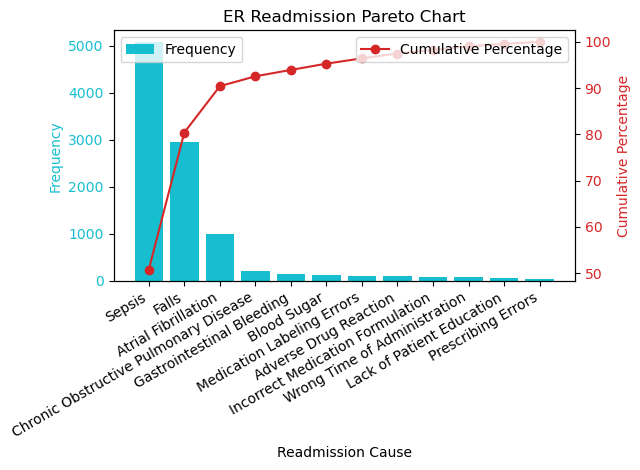

In [30]:
_, ax1 = plt.subplots()

ax1.bar(cause_counts.index, cause_counts.values, color='tab:cyan', label='Frequency')
ax1.set_xlabel('Readmission Cause')
ax1.set_ylabel('Frequency', color='tab:cyan')
ax1.tick_params(axis='y', labelcolor='tab:cyan')
ax1.legend(loc='upper left')


ax2 = ax1.twinx()
ax2.plot(cause_counts.index, cumulative_percent , zorder=2, color='tab:red', label='Cumulative Percentage', marker='o')
ax2.set_ylabel('Cumulative Percentage', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')
ax2.legend(loc='upper right')


plt.title('ER Readmission Pareto Chart')


plt.setp(ax1.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.tight_layout()
plt.show()